# Validation plots for GALAH DR3
## Radial velocity
### Author(s): Sven Buder (SB, MPIA)

In [4]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import pandas
import astropy.io.fits as pyfits
from astropy.table import Table, hstack, vstack
import scipy.optimize

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [36]:
dr3 = Table.read('../../../catalogs/GALAH_DR3_main.fits')

0.22319688005651456 -0.4992294311406464
0.11839634455045846 -1.4881820041199227


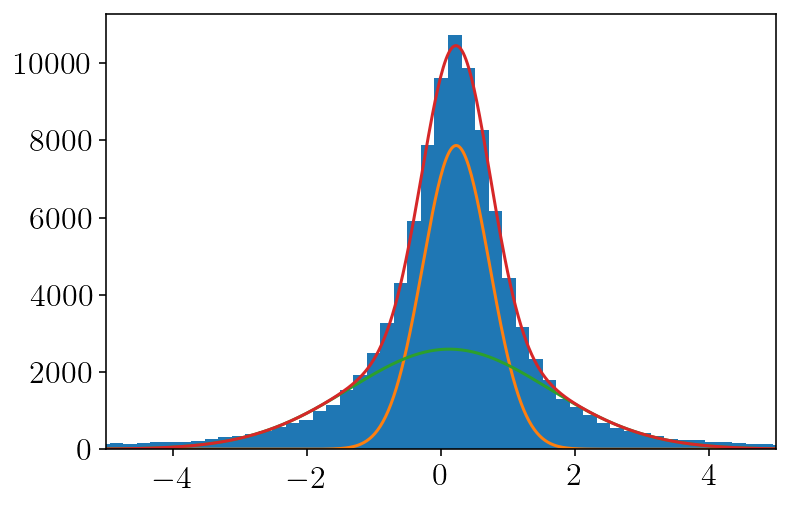

In [37]:
stricter_flags = apply_flags & (dr3['snr_c2_iraf'] > 50)
first_median = np.median(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])
first_mean = np.mean(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])
first_std = np.std(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])

def gauss_2(x,a1,x1,sigma1,a2,x2,sigma2):
    return np.abs(a1)*np.exp(-(x-x1)**2/(2*sigma1**2)) +  np.abs(a2)*np.exp(-(x-x2)**2/(2*sigma2**2))

def gauss(x,a,x0,sigma):
    return np.abs(a)*np.exp(-(x-x0)**2/(2*sigma**2))


hist_bin, x, = np.histogram(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags], bins=np.linspace(-10,10,100))
bin_means = x[:-1]+0.5*(x[1]-x[0])

opt_parms, parm_cov = scipy.optimize.curve_fit(gauss_2,bin_means,hist_bin)

plt.hist(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags],bins=np.linspace(-10,10,100))
plt.plot(np.linspace(-10,10,1000),gauss(np.linspace(-10,10,1000),*opt_parms[:3]))
plt.plot(np.linspace(-10,10,1000),gauss(np.linspace(-10,10,1000),*opt_parms[3:]))
plt.plot(np.linspace(-10,10,1000),gauss_2(np.linspace(-10,10,1000),*opt_parms))
plt.xlim(-5,5)
print(opt_parms[1],opt_parms[2])
print(opt_parms[4],opt_parms[5])


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


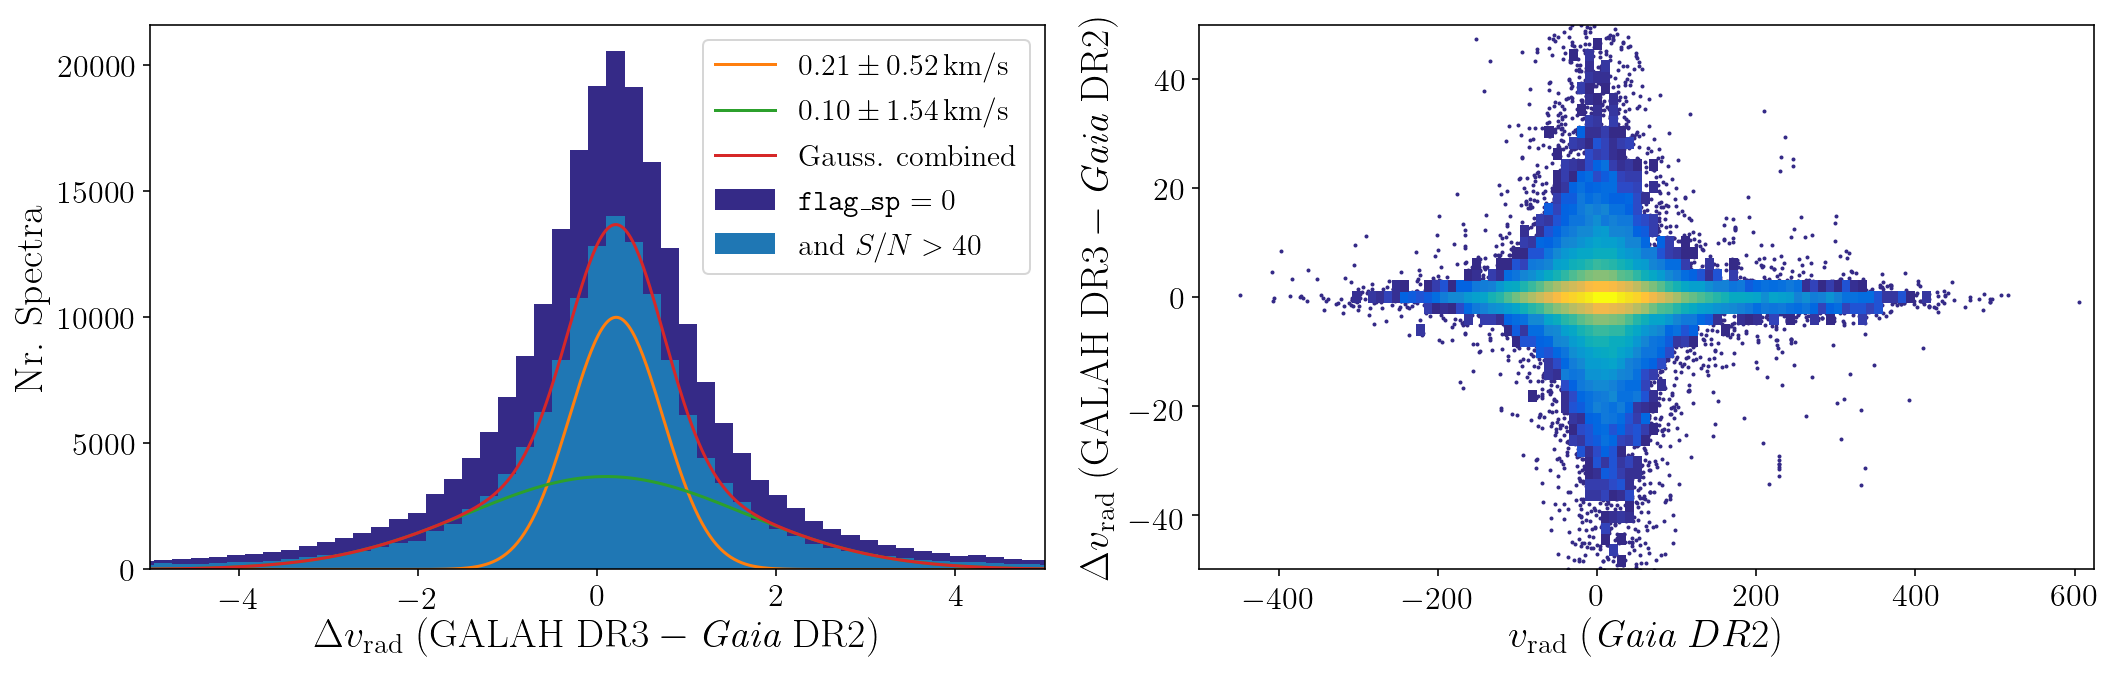

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

apply_flags = (
    (dr3['flag_sp'] == 0) &
    np.isfinite(dr3['rv_gaia']) & 
    np.isfinite(dr3['rv_galah'])
    )

ax1.hist(
    dr3['rv_galah'][apply_flags] - dr3['rv_gaia'][apply_flags],
    bins = np.linspace(-10,10,100),
    color=_parula_data[0],
    label=r'$\texttt{flag\_sp} = 0$'
)

ax2.scatter(
    dr3['rv_gaia'][apply_flags],
    dr3['rv_galah'][apply_flags] - dr3['rv_gaia'][apply_flags],
    c=_parula_data[0],
    zorder=1,
    s=1,
)
ax2.hist2d(
    dr3['rv_gaia'][apply_flags],
    dr3['rv_galah'][apply_flags] - dr3['rv_gaia'][apply_flags],
    bins = (np.linspace(-500,500,100),np.linspace(-100,100,100)),
    zorder=2,
    cmap=parula,
    cmin=5,
    norm=LogNorm(),
    label=r'$\texttt{flag\_sp} = 0$'
);

stricter_flags = apply_flags & (dr3['snr_c2_iraf'] > 40)
first_median = np.median(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])
first_mean = np.mean(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])
first_std = np.std(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags])

def gauss_2(x,a1,x1,sigma1,a2,x2,sigma2):
    return np.abs(a1)*np.exp(-(x-x1)**2/(2.*np.abs(sigma1)**2)) +  np.abs(a2)*np.exp(-(x-x2)**2/(2.*np.abs(sigma2)**2))

def gauss(x,a,x0,sigma):
    return np.abs(a)*np.exp(-(x-x0)**2/(2*sigma**2))


hist_bin, x, = np.histogram(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags], bins=np.linspace(-10,10,100))
bin_means = x[:-1]+0.5*(x[1]-x[0])

opt_parms, parm_cov = scipy.optimize.curve_fit(gauss_2,bin_means,hist_bin,p0=[10000, 0.21, 0.52, 3750, 0.10, 1.50])

ax1.hist(dr3['rv_galah'][stricter_flags] - dr3['rv_gaia'][stricter_flags],bins=np.linspace(-10,10,100),label=r'and $S/N > 40$')
ax1.plot(np.linspace(-10,10,1000),gauss(np.linspace(-10,10,1000),*opt_parms[:3]),label=r'$'+"{:.2f}".format(opt_parms[1])+'\pm'+"{:.2f}".format(opt_parms[2])+'\,\mathrm{km/s}$')
ax1.plot(np.linspace(-10,10,1000),gauss(np.linspace(-10,10,1000),*opt_parms[3:]),label=r'$'+"{:.2f}".format(opt_parms[4])+'\pm'+"{:.2f}".format(opt_parms[5])+'\,\mathrm{km/s}$')
ax1.plot(np.linspace(-10,10,1000),gauss_2(np.linspace(-10,10,1000),*opt_parms),label='Gauss. combined')

ax1.set_xlim(-5,5)
ax2.set_xlim(-500,625)
ax2.set_ylim(-50,50)
ax1.legend(fontsize=15)
ax1.set_xlabel(r'$\Delta v_\text{rad}~(\mathrm{GALAH~DR3 - \textit{Gaia}~DR2})$')
ax1.set_ylabel(r'Nr. Spectra')
ax2.set_xlabel(r'$v_\text{rad}~(\textit{Gaia}~DR2)$')
ax2.set_ylabel(r'$\Delta v_\text{rad}~(\mathrm{GALAH~DR3 - \textit{Gaia}~DR2})$')
plt.tight_layout()
plt.savefig('../../../dr3_release_paper/figures/radial_velocity_comparison.png',bbox_inches='tight',dpi=200)